In [1]:
import math
import torch
import matplotlib.pyplot as plt
%matplotlib inline

/home/dungmaster/anaconda3/envs/fclip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
max_len = 100
d_model = 512

In [3]:
import numpy as np
np.log2(16384)
# np.exp2(10)

14.0

## Positional Embedding

In [3]:
pe = torch.zeros(max_len, d_model)
pos = torch.arange(0, max_len).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2)
                     * (-math.log(10000.0)) / d_model)
pe[:, 0::2] = torch.sin(pos * div_term)
pe[:, 1::2] = torch.cos(pos * div_term)

In [4]:
pos.shape, div_term.shape

(torch.Size([100, 1]), torch.Size([256]))

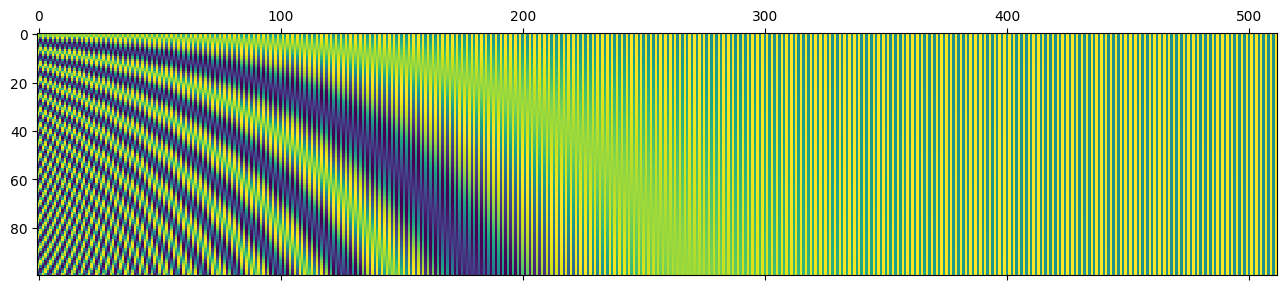

In [5]:
plt.matshow(pe)

In [6]:
pe.shape

torch.Size([100, 512])

## Positional Embedding Module

In [7]:
from model.transformer import PositionalEmbedding
import torch.nn as nn


pe_net = PositionalEmbedding(
    dropout=0.1,
    max_len=max_len,
    d_model=512
)

In [9]:
src_embed = nn.Embedding(max_len, d_model)

In [10]:
x = torch.randint(1, 100, (1, max_len))
x.shape

torch.Size([1, 100])

In [11]:
embed = src_embed(x)
embed.shape

torch.Size([1, 100, 512])

In [14]:
pe.shape

torch.Size([100, 512])

In [13]:
x = embed + pe
x.shape

torch.Size([1, 100, 512])